<a href="https://colab.research.google.com/github/Nhatnguyen2001/NhanDang20KhuonMat/blob/main/NhanDang20Nguoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow import keras
import os
import pickle
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.callbacks import EarlyStopping

In [2]:
#Ket noi voi google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#Link Train va test
train_path = "/content/drive/MyDrive/Colab Notebooks/PROJECT_MACHINE_VERSION/train"
test_path = "/content/drive/MyDrive/Colab Notebooks/PROJECT_MACHINE_VERSION/test"

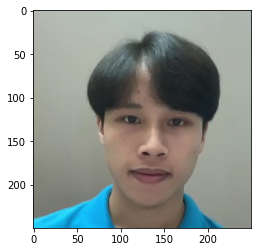

(250, 250, 3)

In [4]:
#Load va Hien thi anh
img = load_img(train_path + "/Luu/BanLuu_0203.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()
img = img_to_array(img)
img.shape

In [5]:
#Load anh thanh train va test 
train = ImageDataGenerator(rescale=1/255,shear_range=0.3,horizontal_flip=True,vertical_flip=False,zoom_range=0.3)
test =ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory(train_path,target_size=(150,150),batch_size=32,color_mode="rgb",class_mode="categorical")
test_dataset = test.flow_from_directory(test_path,target_size=(150,150),batch_size=32,color_mode="rgb",class_mode="categorical")

Found 2541 images belonging to 20 classes.
Found 165 images belonging to 20 classes.


In [6]:
test_dataset.class_indices

{'An': 0,
 'Anh': 1,
 'Chang': 2,
 'Diem': 3,
 'Duc': 4,
 'DuyPhong': 5,
 'HThuan': 6,
 'Hau': 7,
 'Huy': 8,
 'KhanhLinh': 9,
 'Kien': 10,
 'Luu': 11,
 'Ninh': 12,
 'Quan': 13,
 'Quang': 14,
 'Tan': 15,
 'Thanh': 16,
 'Tien': 17,
 'VNhat': 18,
 'nhat': 19}

In [7]:
#Thiet Lap Model 
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.01))

model.add(Dense(20,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
#Complie Model 
model.compile(optimizer="SGD", loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#Training Model 
history = model.fit(train_dataset,epochs = 35 ,batch_size=256, validation_data = test_dataset,callbacks=[EarlyStopping(monitor='val_loss',patience=20)])

Epoch 1/35
80/80 [==============================] - 66s 835ms/step - loss: 2.7093 - accuracy: 0.1905 - val_loss: 2.6638 - val_accuracy: 0.1879
Epoch 2/35
80/80 [==============================] - 21s 261ms/step - loss: 2.2494 - accuracy: 0.3062 - val_loss: 1.9223 - val_accuracy: 0.4303
Epoch 3/35
80/80 [==============================] - 21s 260ms/step - loss: 1.7867 - accuracy: 0.4286 - val_loss: 1.5453 - val_accuracy: 0.4909
Epoch 4/35
80/80 [==============================] - 21s 261ms/step - loss: 1.3722 - accuracy: 0.5533 - val_loss: 1.2686 - val_accuracy: 0.5515
Epoch 5/35
80/80 [==============================] - 21s 260ms/step - loss: 1.1321 - accuracy: 0.6399 - val_loss: 1.0334 - val_accuracy: 0.6485
Epoch 6/35
80/80 [==============================] - 21s 262ms/step - loss: 0.8387 - accuracy: 0.7446 - val_loss: 0.5081 - val_accuracy: 0.8606
Epoch 7/35
80/80 [==============================] - 21s 262ms/step - loss: 0.5643 - accuracy: 0.8257 - val_loss: 0.4830 - val_accuracy: 0.8182

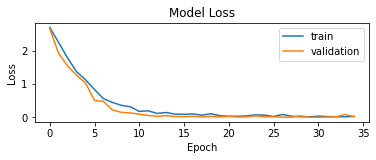

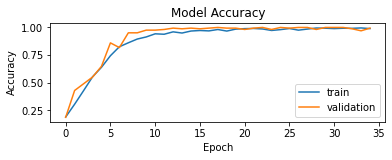

In [12]:
#Ve Do thi Loss
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()
#Ve Do thi Accuracy
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

In [13]:
#Tinh toan do chinh xac va sai so 
score = model.evaluate(test_dataset,verbose = 0)
print('Sai so kiem tra la:',score[0])
print('Do chinh xac kiem tra', score[1])

Sai so kiem tra la: 0.020164672285318375
Do chinh xac kiem tra 0.9939393997192383


In [14]:
label=['An','Anh','Chang','Diem','Duc', 'DuyPhong', 'HThuan','Hau','Huy','KhanhLinh','Kien','Luu','Ninh','Quan','Quang','Tan','Thanh','Tien','VNhat','nhat']

Day la nhat


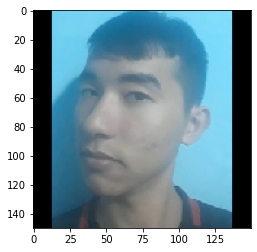

In [15]:
#Load va hien thi anh 
img = load_img(test_path + "/nhat/005.jpg",grayscale=False,color_mode='rgb',target_size=(150,150))
plt.imshow(img)
#Chuyen Anh ve Dang Array
img = img_to_array(img)
x = np.expand_dims(img,axis=0)
images = np.vstack([x])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images))])

Day la Tan


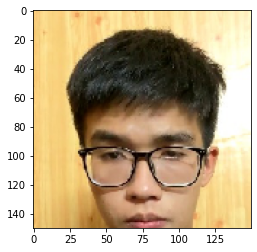

In [16]:
#Load va hien thi anh 
img1 = load_img(test_path + "/Tan/BanTan_0318.jpg",grayscale=False,color_mode='rgb',target_size=(150,150))
plt.imshow(img1)
#Chuyen Anh ve Dang Array
img1 = img_to_array(img1)
x1 = np.expand_dims(img1,axis=0)
images1 = np.vstack([x1])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images1))])

Day la Thanh


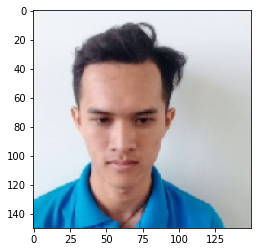

In [17]:
#Load va hien thi anh 
img2 = load_img(test_path + "/Thanh/BanThanh_0222.jpg",grayscale=False,color_mode='rgb',target_size=(150,150))
plt.imshow(img2)
#Chuyen Anh ve Dang Array
img2 = img_to_array(img2)
x2 = np.expand_dims(img2,axis=0)
images2 = np.vstack([x2])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images2))])

Day la VNhat


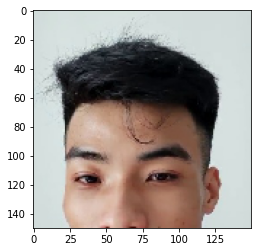

In [18]:
#Load va hien thi anh 
img3 = load_img(test_path + "/VNhat/VNhat_0259.jpg",grayscale=False,color_mode='rgb',target_size=(150,150))
plt.imshow(img3)
#Chuyen Anh ve Dang Array
img3 = img_to_array(img3)
x3 = np.expand_dims(img3,axis=0)
images3 = np.vstack([x3])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images3))])

Day la Quan


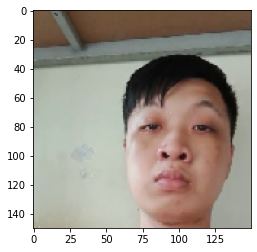

In [19]:
#Load va hien thi anh 
img4 = load_img(test_path + "/Quan/Quan_0262.jpg",grayscale=False,color_mode='rgb',target_size=(150,150))
plt.imshow(img4)
#Chuyen Anh ve Dang Array
img4 = img_to_array(img4)
x4 = np.expand_dims(img4,axis=0)
images4 = np.vstack([x4])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images4))])

Day la An


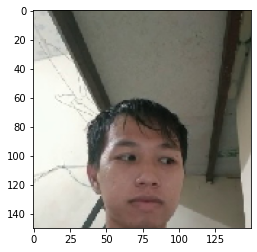

In [20]:
#Load va hien thi anh 
img5 = load_img(test_path + "/An/An_0215.jpg",grayscale=False,color_mode='rgb',target_size=(150,150))
plt.imshow(img5)
#Chuyen Anh ve Dang Array
img5 = img_to_array(img5)
x5 = np.expand_dims(img5,axis=0)
images5 = np.vstack([x5])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images5))])

Day la Anh


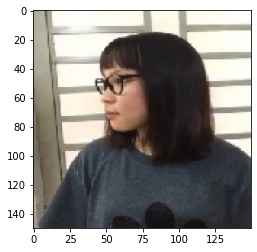

In [21]:
#Load va hien thi anh 
img6 = load_img(test_path + "/Anh/Anh_0231.jpg",grayscale=False,color_mode='rgb',target_size=(150,150))
plt.imshow(img6)
#Chuyen Anh ve Dang Array
img6 = img_to_array(img6)
x6 = np.expand_dims(img6,axis=0)
images6 = np.vstack([x6])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images6))])

Day la Chang


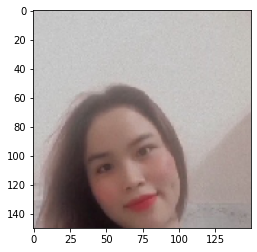

In [22]:
#Load va hien thi anh 
img7 = load_img(test_path + "/Chang/Chang_0223.jpg",grayscale=False,color_mode='rgb',target_size=(150,150))
plt.imshow(img7)
#Chuyen Anh ve Dang Array
img7 = img_to_array(img7)
x7 = np.expand_dims(img7,axis=0)
images7 = np.vstack([x7])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images7))])

Day la Diem


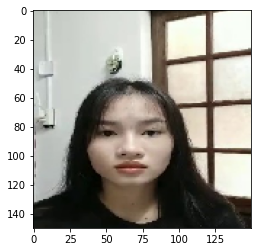

In [23]:
#Load va hien thi anh 
img8 = load_img(test_path + "/Diem/Diem_0426.jpg",grayscale=False,color_mode='rgb',target_size=(150,150))
plt.imshow(img8)
#Chuyen Anh ve Dang Array
img8 = img_to_array(img8)
x8 = np.expand_dims(img8,axis=0)
images8 = np.vstack([x8])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images8))])

Day la Duc


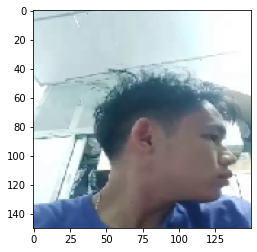

In [24]:
#Load va hien thi anh 
img9 = load_img(test_path + "/Duc/Duc_0258.jpg",grayscale=False,color_mode='rgb',target_size=(150,150))
plt.imshow(img9)
#Chuyen Anh ve Dang Array
img9 = img_to_array(img9)
x9 = np.expand_dims(img9,axis=0)
images9 = np.vstack([x9])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images9))])

Day la nhat


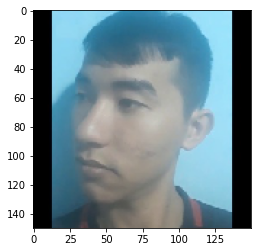

In [25]:
#Load va hien thi anh 
img10 = load_img(test_path + "/nhat/070.jpg",grayscale=False,color_mode='rgb',target_size=(150,150))
plt.imshow(img10)
#Chuyen Anh ve Dang Array
img10 = img_to_array(img10)
x10 = np.expand_dims(img10,axis=0)
images10 = np.vstack([x10])
#Du Doan hinh anh 
print('Day la '+ label[np.argmax(model.predict(images10))])